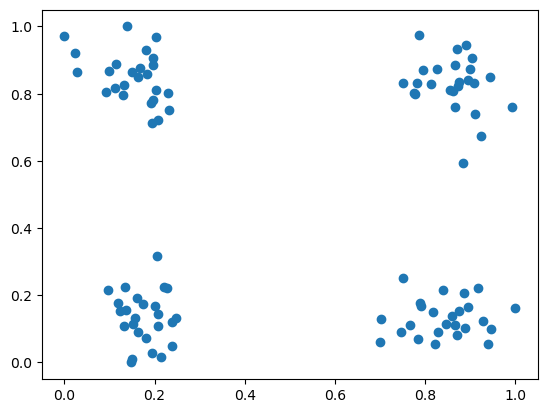

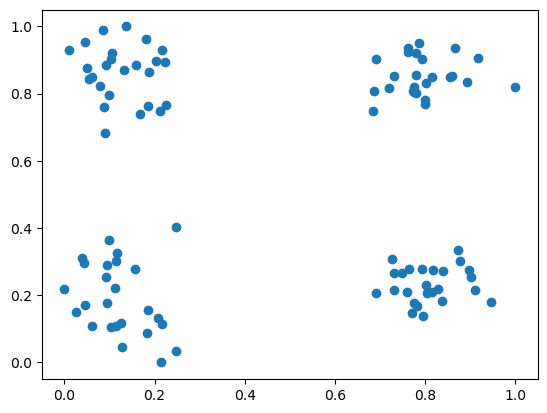

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

np.random.seed(1234)
mm = preprocessing.MinMaxScaler()

# train data
train_size = 25
train_x = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=train_size)
train_x = np.r_[train_x, np.random.multivariate_normal([10, 10], [[1, 0], [0, 1]], size=train_size)]
train_x = np.r_[train_x, np.random.multivariate_normal([0, 10], [[1, 0], [0, 1]], size=train_size)]
train_x = np.r_[train_x, np.random.multivariate_normal([10, 0], [[1, 0], [0, 1]], size=train_size)]
train_x = mm.fit_transform(train_x)
train_label = np.full(train_size, 0)
train_label = np.r_[train_label, np.full(train_size, 1)]
train_label = np.r_[train_label, np.full(train_size, 2)]
train_label = np.r_[train_label, np.full(train_size, 3)].reshape(-1, 1)

idx = np.arange(train_x.shape[0])
np.random.shuffle(idx)
train_x = train_x[idx, :].copy()
train_label = train_label[idx, :].copy()

plt.figure()
plt.scatter(train_x[:, 0], train_x[:, 1])
plt.show()



# test data
test_size = 25
test_x = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=test_size)
test_x = np.r_[test_x, np.random.multivariate_normal([10, 10], [[1, 0], [0, 1]], size=test_size)]
test_x = np.r_[test_x, np.random.multivariate_normal([0, 10], [[1, 0], [0, 1]], size=test_size)]
test_x = np.r_[test_x, np.random.multivariate_normal([10, 0], [[1, 0], [0, 1]], size=test_size)]
test_x = mm.fit_transform(test_x)
test_label = np.full(test_size, 0)
test_label = np.r_[test_label, np.full(test_size, 1)]
test_label = np.r_[test_label, np.full(test_size, 2)]
test_label = np.r_[test_label, np.full(test_size, 3)].reshape(-1, 1)

idx = np.arange(test_x.shape[0])
np.random.shuffle(idx)
test_x = test_x[idx, :].copy()
test_label = test_label[idx, :].copy()

plt.figure()
plt.scatter(test_x[:, 0], test_x[:, 1])
plt.show()

In [7]:
import torch

train_x = torch.tensor(train_x, requires_grad=True, dtype = torch.float32)
train_label = torch.tensor(train_label, dtype = torch.long)
test_x = torch.tensor(test_x, requires_grad=True, dtype = torch.float32)
test_label = torch.tensor(test_label, dtype = torch.long)

print(train_x.shape)
print(train_label.shape)
print(test_x.shape)
print(test_label.shape)

torch.Size([100, 2])
torch.Size([100, 1])
torch.Size([100, 2])
torch.Size([100, 1])


In [9]:
import torch.nn as nn

class LLGMN(nn.Module):
    def __init__(self, dim, classNum, componentNum):
        self.dim = dim
        self.classNum = classNum
        self.componentNum = componentNum
        self.logSize = int(1 + dim * (dim + 3) / 2)
        
        self.in1 = torch.ones(self.logSize, dtype=torch.float32)
        self.out1 = torch.zeros(self.logSize, dtype=torch.float32)
        self.in2 = torch.zeros((self.classNum, self.componentNum), dtype=torch.float32)
        self.out2 = torch.zeros((self.classNum, self.componentNum), dtype=torch.float32)
        self.in3 = torch.zeros(self.classNum, dtype=torch.float32)
        self.out3 = torch.zeros(self.classNum, dtype=torch.float32)
        
        super(LLGMN, self).__init__()
        self.weight = nn.Parameter(0.01 * torch.randn((self.classNum, self.componentNum, self.logSize), dtype=torch.float32))
        
    def forward(self, X):
        rho = 1e-5
        
        # ---第1層---
        x = X.reshape(self.dim, 1)
        a = x @ x.T
        for i in range(self.dim):
            self.in1[i+1] = X[i]
        for i in range(self.logSize - self.dim -1):
            self.in1[i+self.dim+1] = a[np.triu_indices(self.dim)][i]
        self.out1 = self.in1.clone()
        # ---第1層---
        
        for c in range(self.classNum):
            for m in range(self.componentNum):
                # ---第2層---
                self.in2[c][m] = torch.sum(self.weight[c][m].clone() * self.out1.clone())
                self.out2[c][m] = torch.exp(self.in2[c][m].clone()) / torch.sum(torch.exp(self.in2.clone()))
                # ---第2層---
            # ---第3層---
            self.in3[c] = torch.sum(self.out2[c].clone())
        self.out3 = self.in3.clone()
        # ---第3層---
        y = self.out3.clone()
        return y

dim = 2
classNum = 4
componentNum = 16

model = LLGMN(dim, classNum, componentNum)
print(model)

LLGMN()


index:0, loss:1.3856322765350342
index:1, loss:1.3894931077957153
index:2, loss:1.3955107927322388
index:3, loss:1.3835803270339966
index:4, loss:1.395339012145996
index:5, loss:1.3957933187484741
index:6, loss:1.3655108213424683
index:7, loss:1.3605341911315918
index:8, loss:1.3537778854370117
index:9, loss:1.3801915645599365
index:10, loss:1.3885517120361328
index:11, loss:1.3847534656524658
index:12, loss:1.368544578552246
index:13, loss:1.3815114498138428
index:14, loss:1.347944974899292
index:15, loss:1.3869508504867554
index:16, loss:1.3338786363601685
index:17, loss:1.3864612579345703
index:18, loss:1.3517365455627441
index:19, loss:1.3658369779586792
index:20, loss:1.3257625102996826
index:21, loss:1.3064725399017334
index:22, loss:1.39150071144104
index:23, loss:1.3900710344314575
index:24, loss:1.3446770906448364
index:25, loss:1.306465744972229
index:26, loss:1.2783204317092896
index:27, loss:1.3403204679489136
index:28, loss:1.3669716119766235
index:29, loss:1.3675823211669

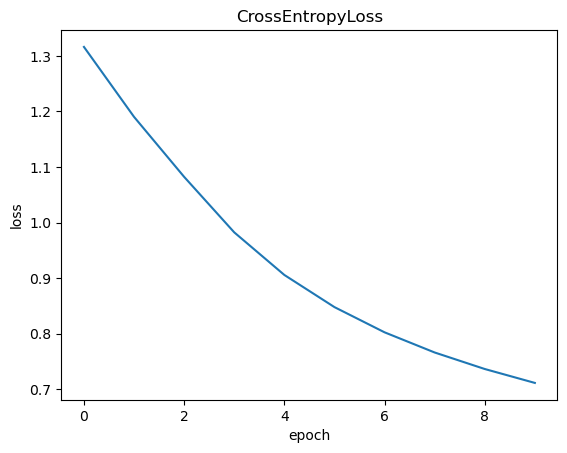

In [10]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_record = []
epochs = 10

for epoch in range(1, epochs + 1):
    model.train()
    running_loss = 0.0
    for j, (X, label) in enumerate(zip(train_x, train_label)):
        y = model(X).view(-1, classNum)
        loss = loss_function(y, label)
        print("index:{}, loss:{}".format(j, loss))
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
    running_loss /= j+1
    loss_record.append(running_loss)
    print("epoch:", epoch, "\t", "loss:", running_loss)
print("done.")

plt.figure()
plt.plot(loss_record)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("CrossEntropyLoss")
plt.savefig("clasNum=4_result/LL_loss.png")

In [11]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

predict_list = np.ones(len(test_label))
answer_list = np.ones(len(test_label))
predict_df = pd.DataFrame(columns=["answer", "predict", "exact"])
model.eval()
with torch.no_grad():
    for j, (X, label) in enumerate(zip(test_x, test_label)):
        y = model(X)
        predict = torch.argmax(y).to("cpu")
        predict = np.array(predict)
        predict_list[j] = predict 
        answer = np.array(label.item())
        answer_list[j] = answer
        exact = "O" if predict.item() == answer.item() else "X"
        s = pd.Series([answer, predict, exact], index=predict_df.columns)
        predict_df = predict_df.append(s, ignore_index=True)

print(predict_df.value_counts("exact"))
print(predict_df)

exact
O    95
X     5
dtype: int64
   answer predict exact
0       2       2     O
1       2       2     O
2       1       1     O
3       1       1     O
4       0       0     O
..    ...     ...   ...
95      0       2     X
96      3       3     O
97      1       1     O
98      0       2     X
99      2       2     O

[100 rows x 3 columns]


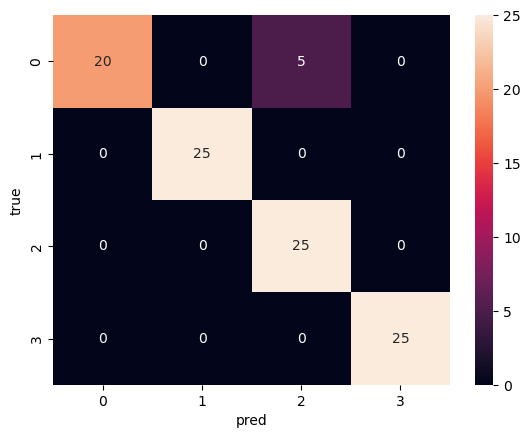

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

report = classification_report(answer_list, predict_list,output_dict= True)
pd_report = pd.DataFrame(report).transpose()
pd_report.to_csv("clasNum=4_result/report.csv")

matrix = confusion_matrix(answer_list, predict_list)
sns.heatmap(matrix, annot=True)
plt.xlabel("pred")
plt.ylabel('true')
plt.savefig("clasNum=4_result/confusion_matrix.png")